1. Load indepencies

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load dataset & Overview

In [2]:
os.getcwd()

'd:\\Projects\\customer-churn-prediction\\notebooks'

In [3]:
DATA_PATH = "../data/raw/Customer-Churn.csv"  # adjust if different

df = pd.read_csv(DATA_PATH)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# print the shape the df
df.shape

(7043, 21)

In [5]:
# print the datatype of df
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Initial overview of dataset**

- The dataset consist of 7043 rows and 21 columns

- Most columns are categorical, so we need to apply categorical transformation.

- **TotalCharges** column should be float or int type but it is object type.

In [7]:
df['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [8]:
df["TotalCharges"].unique()[0:10]

array(['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5',
       '1949.4', '301.9', '3046.05', '3487.95'], dtype=object)

In [9]:
df["TotalCharges"].apply(lambda x: str(x).strip().replace(".", "", 1).isdigit()).value_counts()

TotalCharges
True     7032
False      11
Name: count, dtype: int64

In [10]:
df[~df["TotalCharges"].apply(lambda x: str(x).strip().replace(".", "", 1).isdigit())]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


df['TotalCharges'].dtype

C:\Users\harma\AppData\Local\Temp\ipykernel_16360\1794557879.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


dtype('float64')

In [12]:
# Numeric summary of dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Null Summary

In [13]:
# find null or missing values
df.isna().sum().sort_values()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.nunique().sort_values()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
PaperlessBilling       2
Churn                  2
MultipleLines          3
TechSupport            3
StreamingTV            3
OnlineBackup           3
DeviceProtection       3
StreamingMovies        3
Contract               3
OnlineSecurity         3
InternetService        3
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6531
customerID          7043
dtype: int64

In [15]:
df = df.drop(columns=["customerID"])

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Visulization

In [17]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

cat_cols.remove("customerID") if "customerID" in cat_cols else None
print("Categorical:", len(cat_cols), "Numeric:", len(num_cols))


Categorical: 16 Numeric: 4


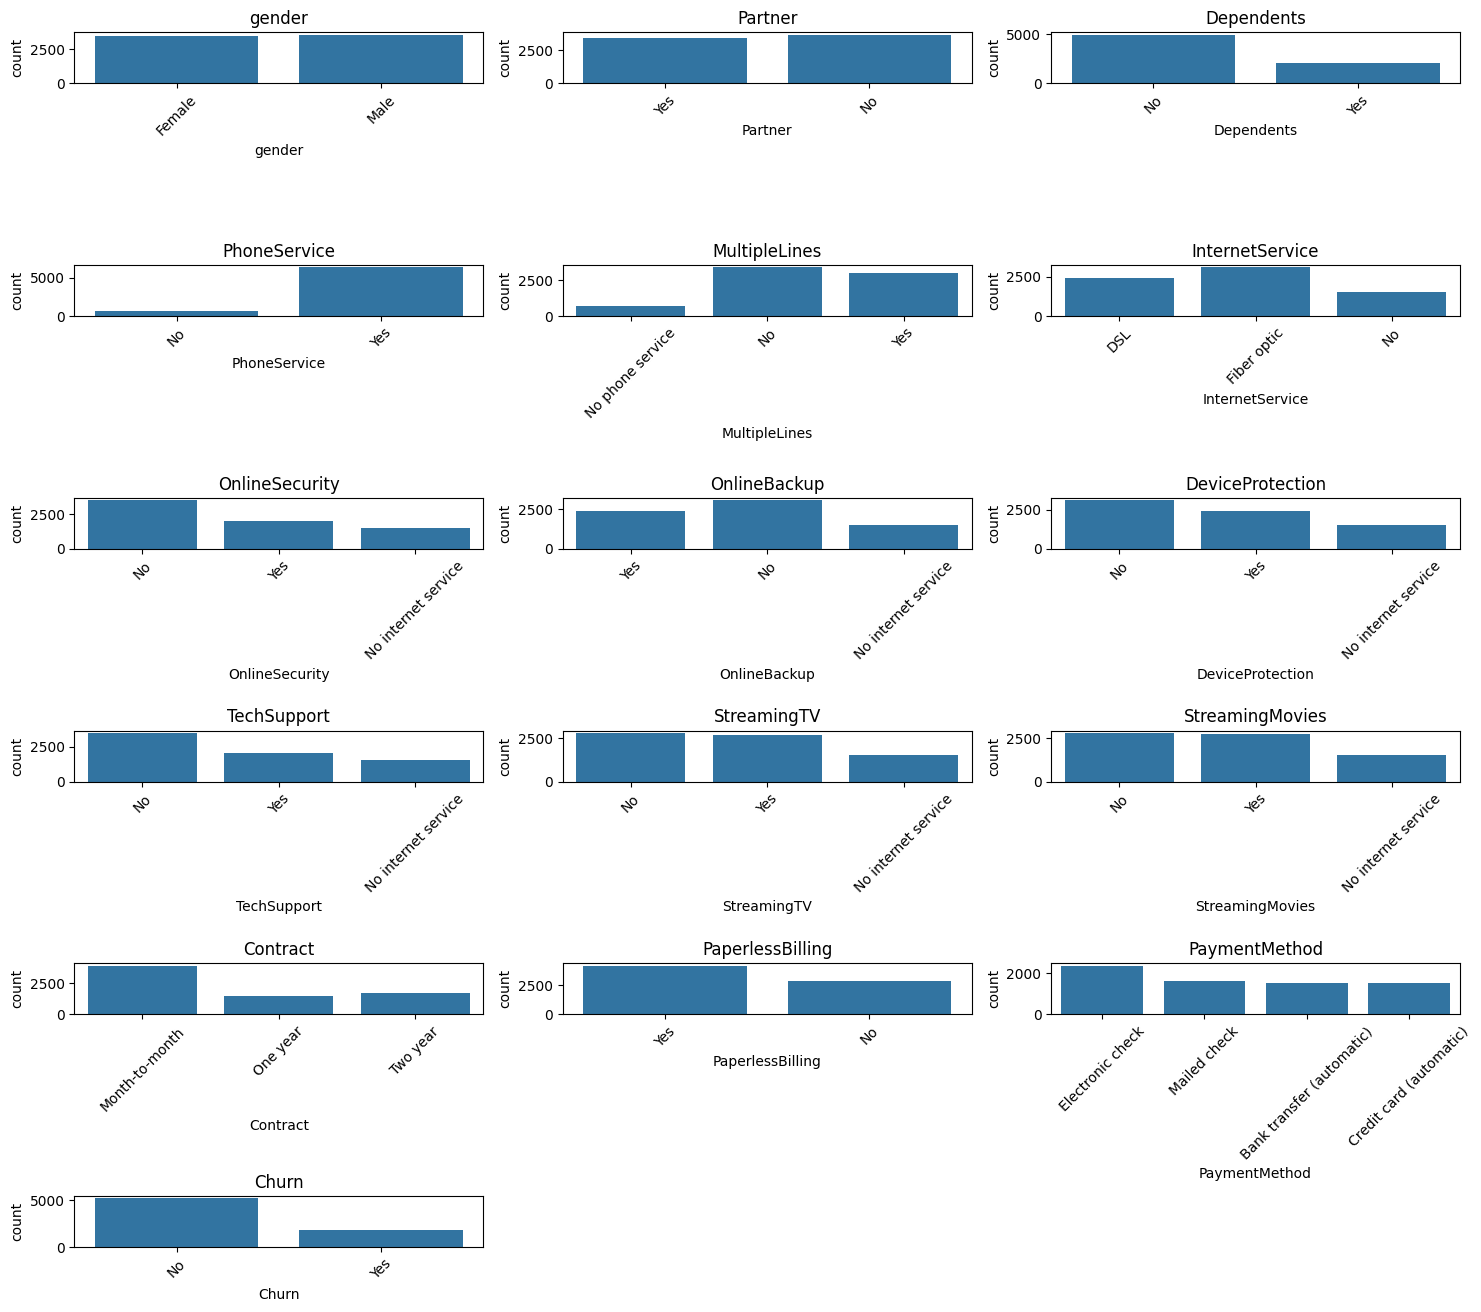

In [18]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(cat_cols, 1):  # start subplot index at 1
    plt.subplot(7, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [19]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", 
        "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"]

for col in cols:
    if col in df.columns:
        df[col] = df[col].replace({
            "No internet service": "No",
            "No phone service": "No"
        })

df['Contract'] = df['Contract'].replace({
    'Month-to-month': 'Monthly',
    'One year': '1-Year',
    'Two year': '2-Year'
})

df["PaymentMethod"] = df["PaymentMethod"].replace({
    "Electronic check": "E-Check",
    "Mailed check": "Mail",
    "Bank transfer (automatic)": "Bank Auto",
    "Credit card (automatic)": "Card Auto"
})


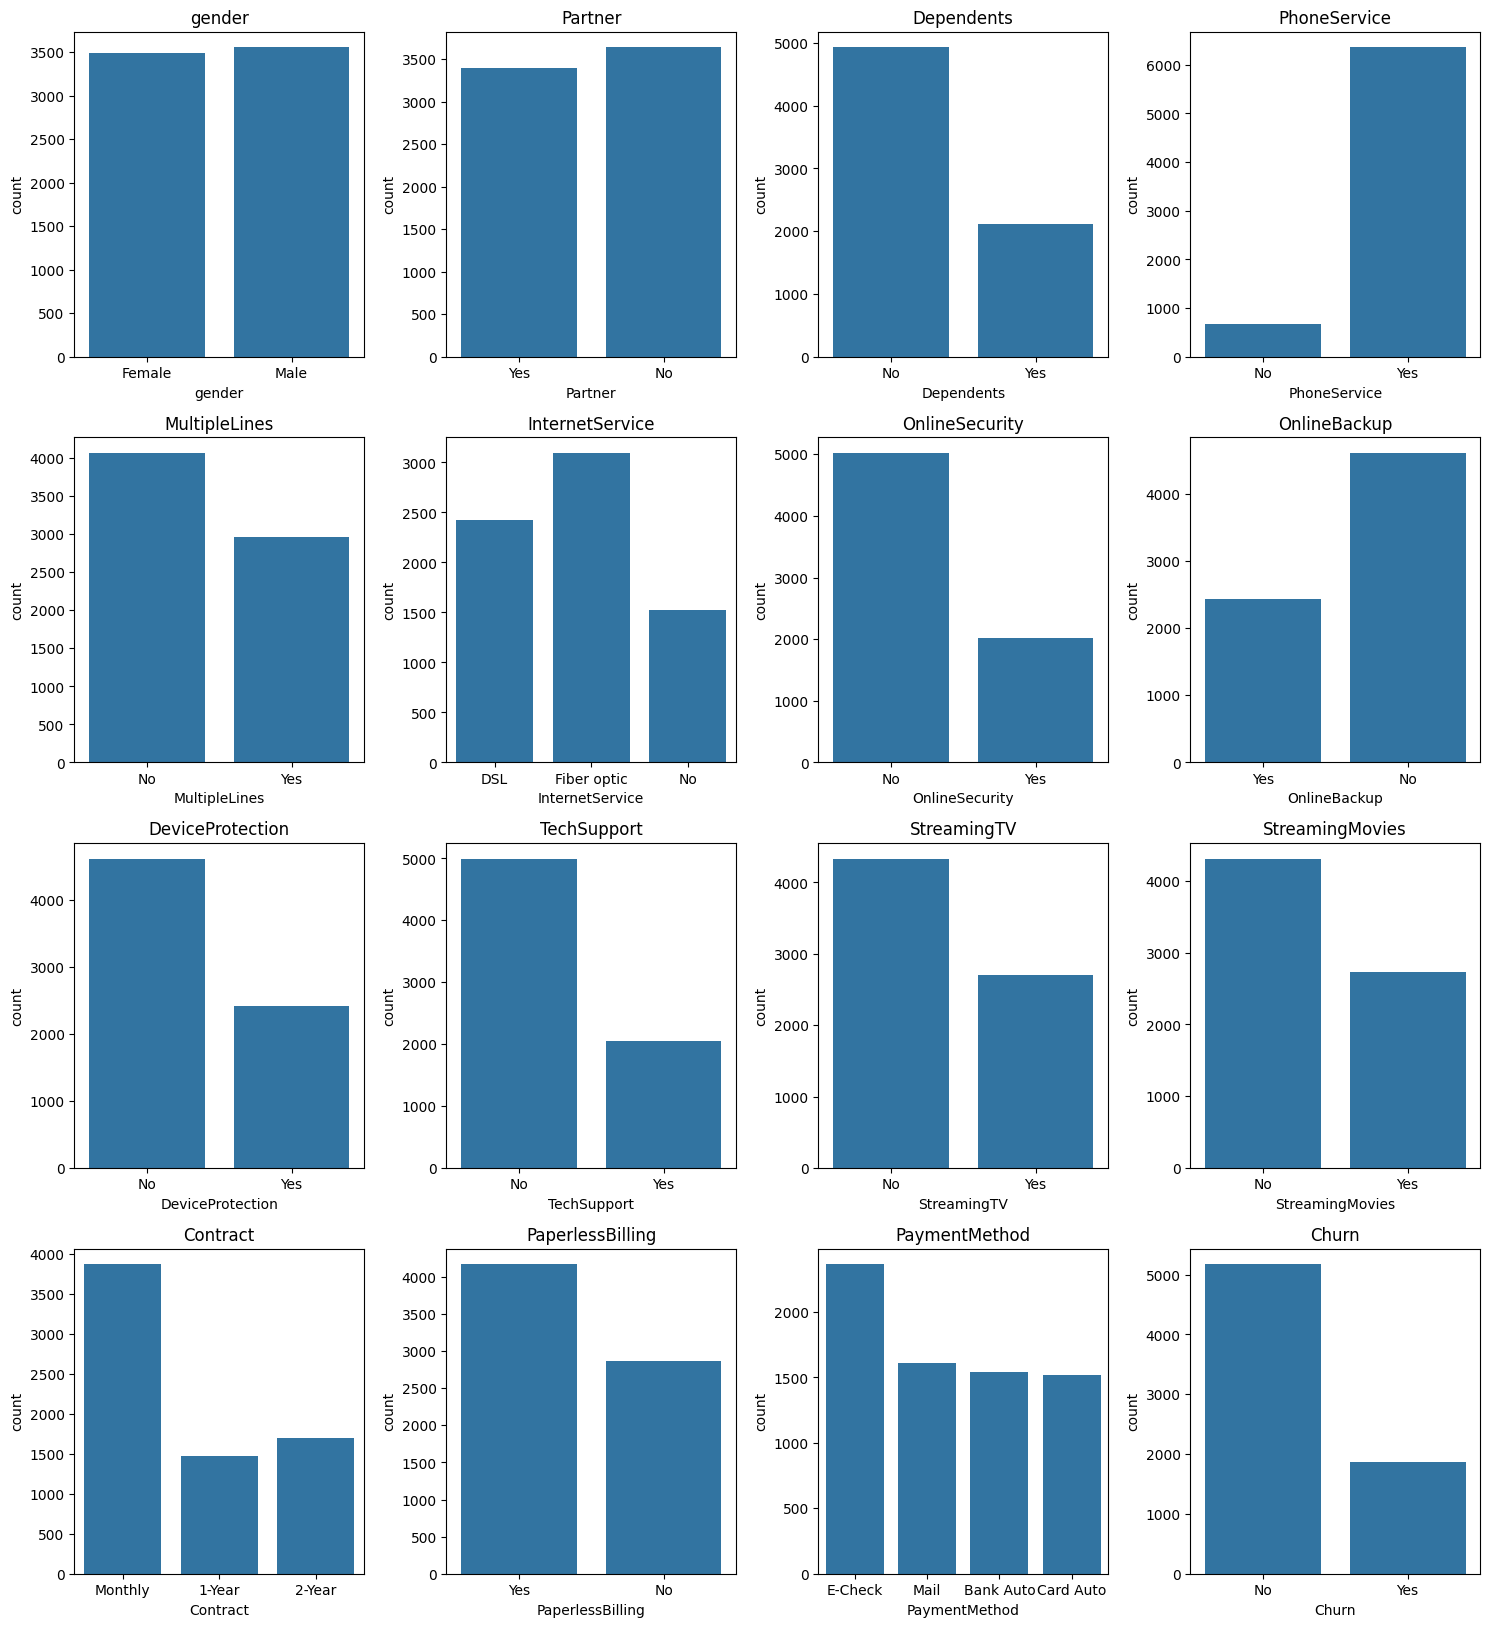

In [20]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(cat_cols, 1):  # start subplot index at 1
    plt.subplot(5, 4 , i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks()

plt.tight_layout()
plt.show()

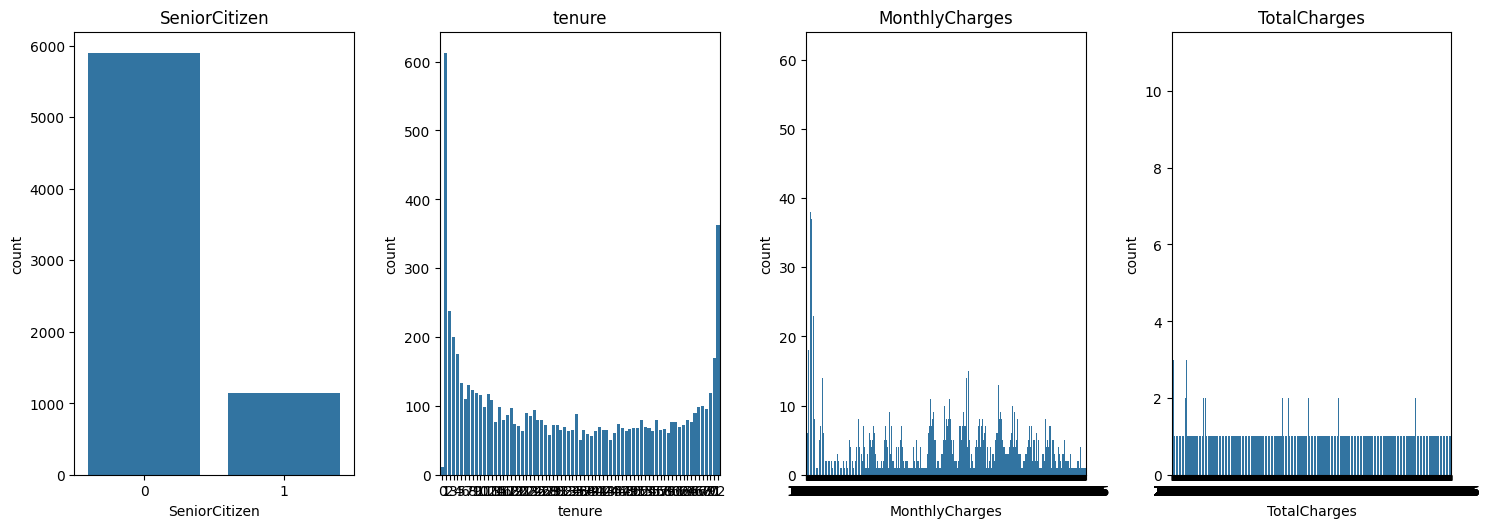

In [21]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(num_cols, 1):  # start subplot index at 1
    plt.subplot(4, 4 , i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks()

plt.tight_layout()
plt.show()

From the above countplot plots we can draw concrete evidnnce so we will do histogram plot with 30 bins 

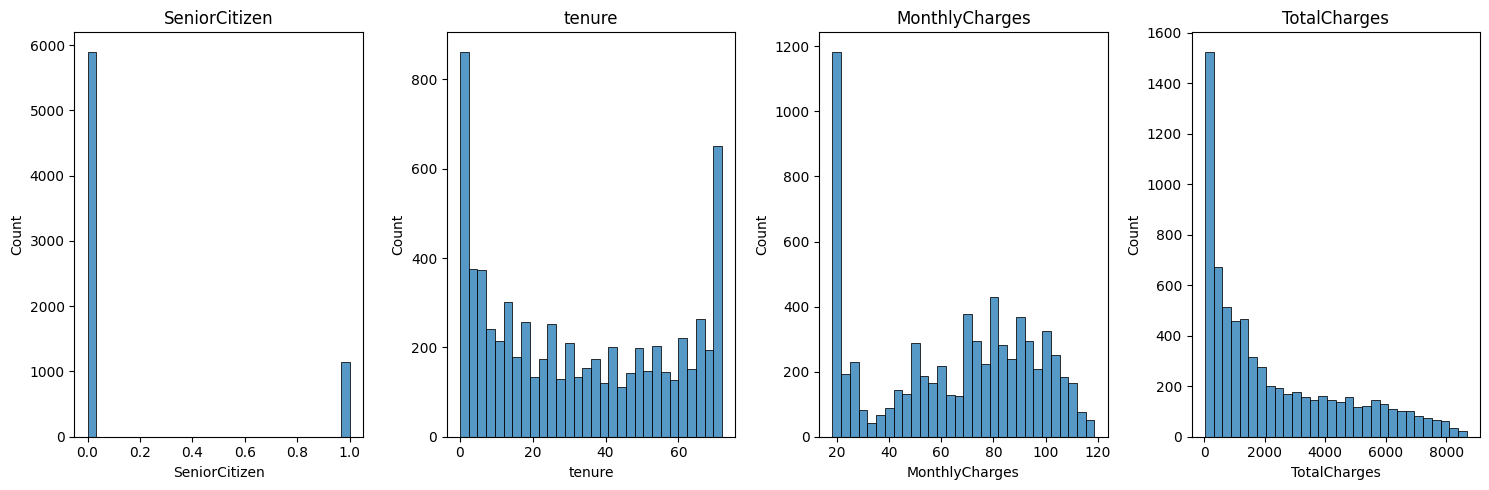

In [22]:
import seaborn as sns

plt.figure(figsize=(15, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 4, i)
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(col)
    plt.xlabel(col)
   
plt.tight_layout()
plt.show()


Churn distribution

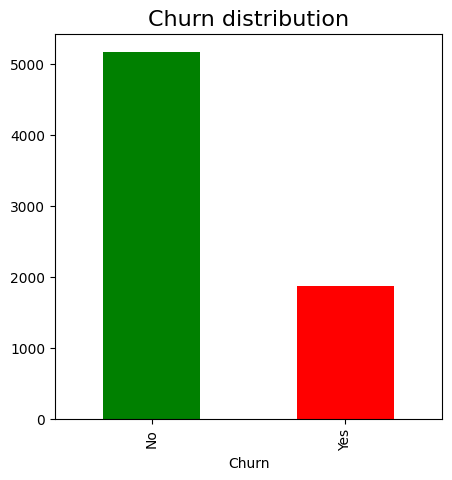

In [23]:
plt.figure(figsize=(5,5))
df['Churn'].value_counts().plot(kind = 'bar', color=['green','Red'])
plt.title('Churn distribution', fontsize= 16)
plt.ylabel=('Counts')
plt.show()                                

We have more data present with no as compared to yes. This means data is imbalanced

Bivariate Analysis

Categorical Features vs Churn

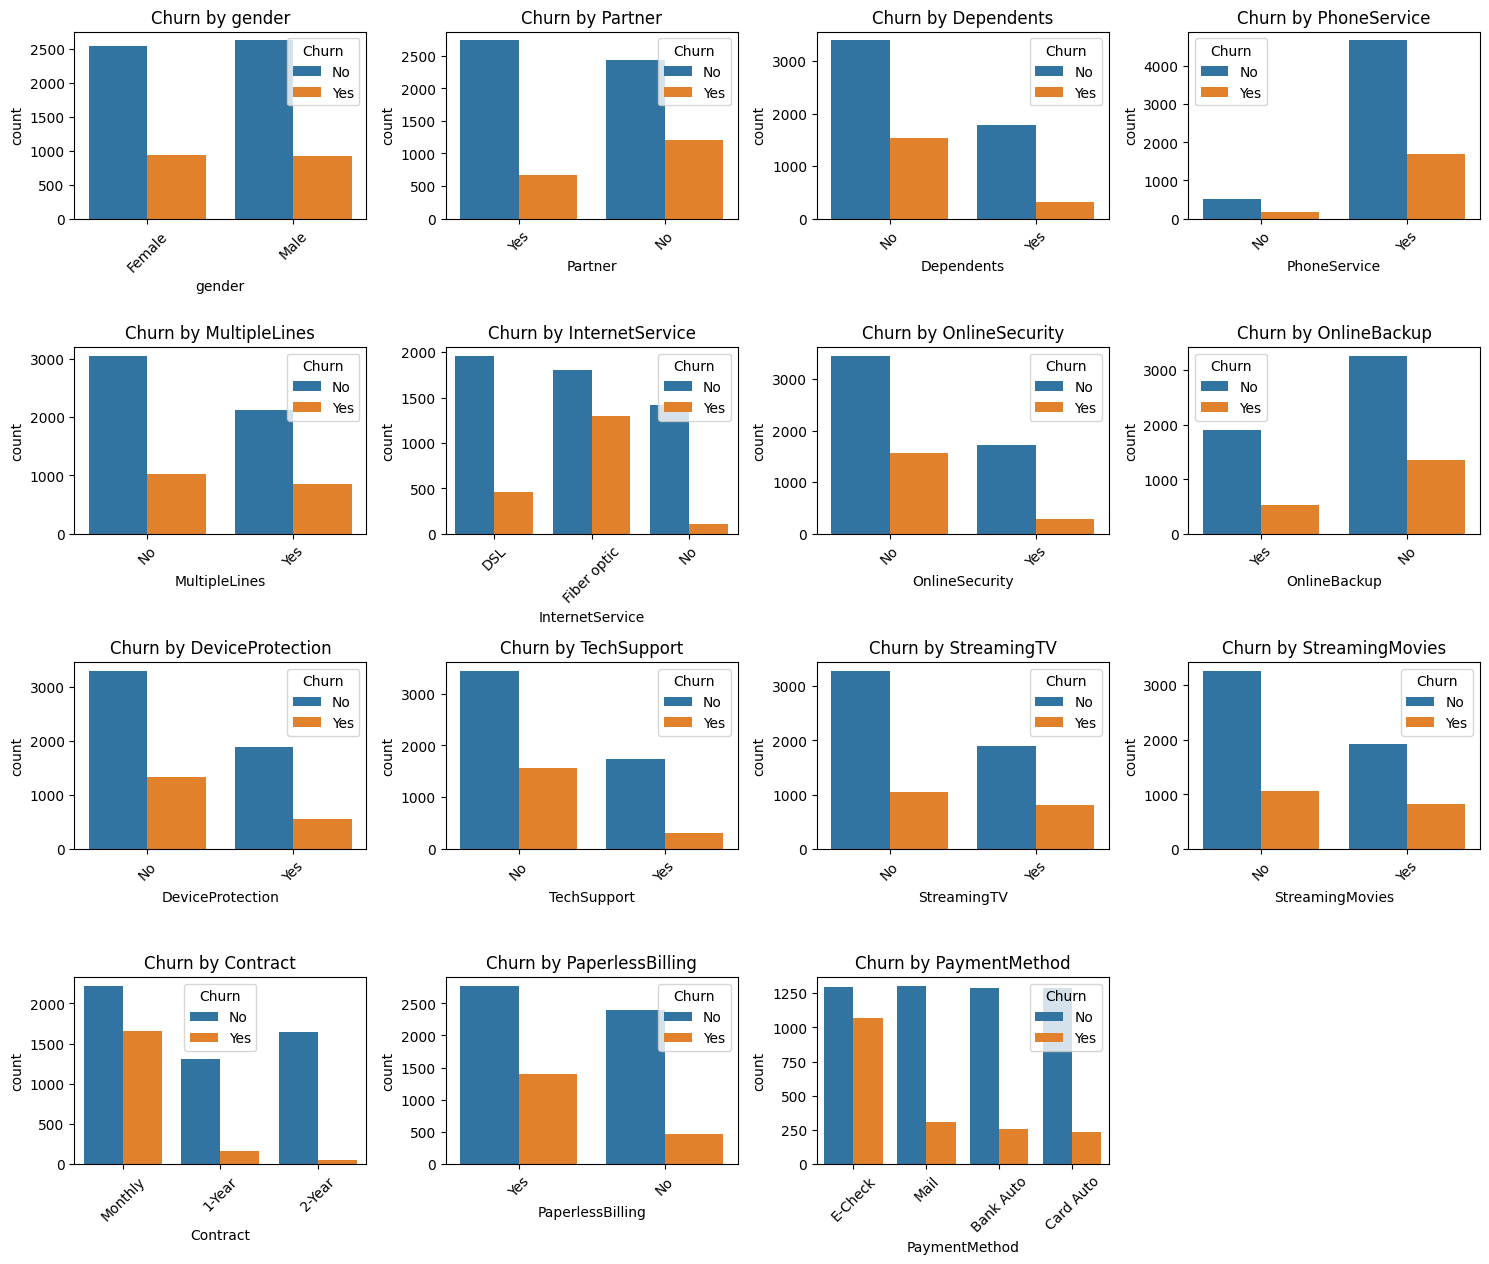

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = [col for col in df.columns if df[col].dtype == "object" and col != "Churn"]

plt.figure(figsize=(15, 15))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 4, i)  # up to 20 plots (adjust if needed)
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Bivariate Analysis — Key Findings

**Strong Predictors of Churn**

Contract:
Customers with monthly contracts have much higher churn than 1-Year or 2-Year contracts.

PaymentMethod:
Churn is highest for Electronic check users. Lowest for Bank Auto and Card Auto.

OnlineSecurity, TechSupport, DeviceProtection:
Customers without these services churn more.

**Moderate Predictors**

InternetService:
Fiber optic users show higher churn than DSL or no service.

PaperlessBilling:
Slight increase in churn among paperless users.

StreamingTV, StreamingMovies, OnlineBackup:
Minor churn differences between Yes/No users.

**Weak Predictors (little difference in churn rate)**

Gender, Partner, Dependents, PhoneService, MultipleLines

These features show no strong pattern with churn and may have low predictive value.

Numerica col vs churn

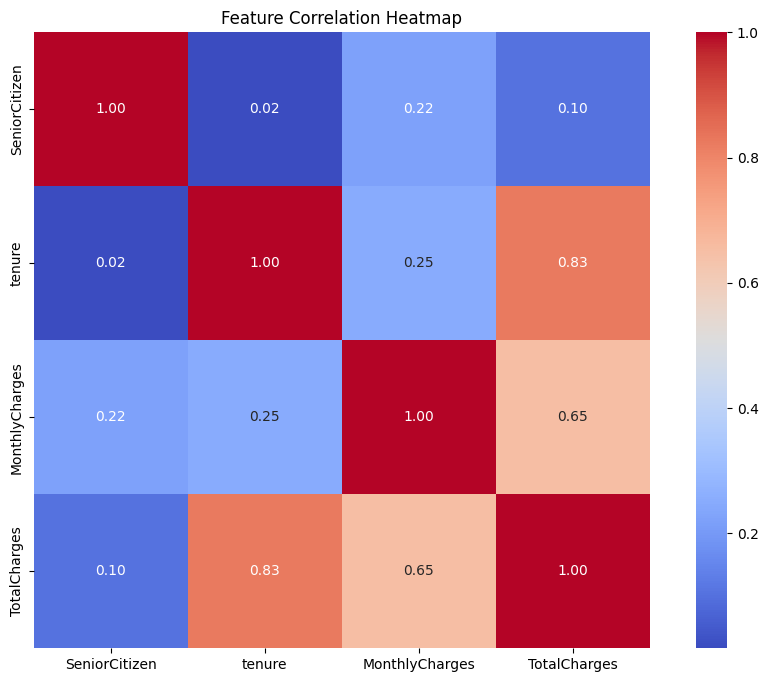

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


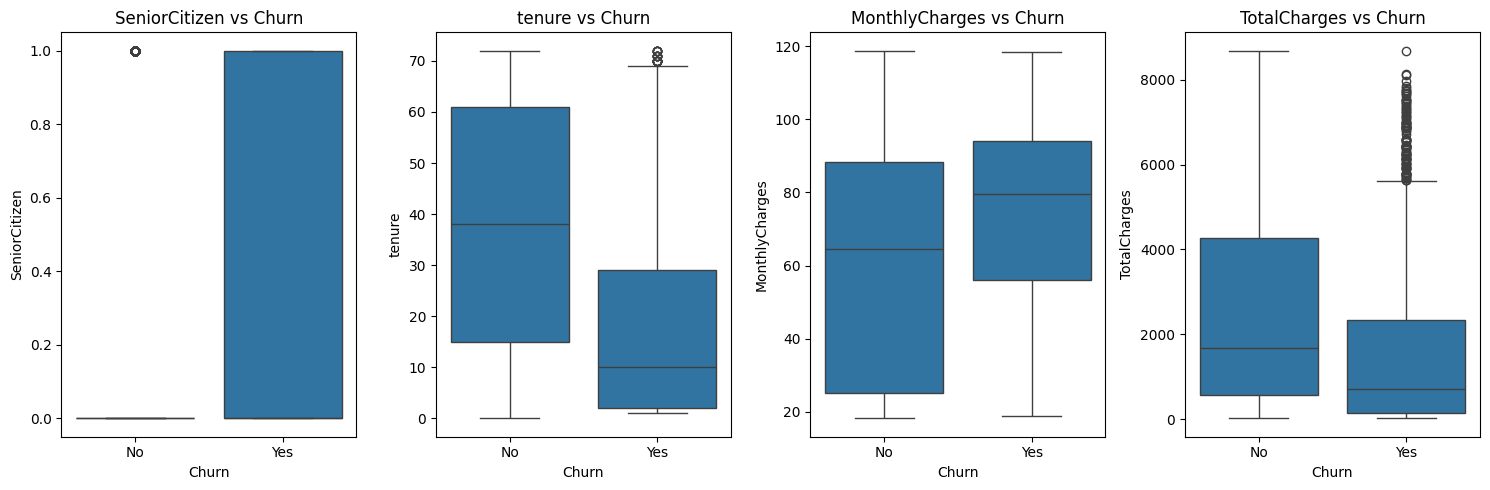

In [26]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(data=df, x="Churn", y=col)
    plt.title(f"{col} vs Churn")

plt.tight_layout()
plt.show()


**Numeric Features vs Churn — Boxplot Insights**
 
- SeniorCitizen: Churn is slightly higher among senior citizens (1 = Yes) and not a strong numeric feature, just a binary indicator
- tenure: Churned customers have low tenure and retained customers have high tenure

**Strong negative relationship with churn**

- MonthlyCharges: Churned customers have higher monthly charges on average which indicates price sensitivity may affect churn.
- TotalCharges: 

Strongly aligned with tenure

Churned customers paid less total (due to leaving early)

Overlaps with tenure; possible redundancy


#### Key Takeaways

tenure is the strongest numeric predictor (inverse relation with churn)

MonthlyCharges also important (higher charges → more churn)

TotalCharges adds similar info to tenure, may be correlated

SeniorCitizen has weak but usable signal

---

### Data Preprocessing

- Removed the customerID column (non-informative identifier)

- Converted TotalCharges from string to float

- Verified no missing values in the dataset

- Mapped binary categorical columns:

    "Yes" → 1

    "No" → 0

- Applied one-hot encoding to multi-class categorical features

- Scaled numeric columns: tenure, MonthlyCharges, TotalCharges using StandardScaler

- Stored the final cleaned dataset to data/processed/cleaned_churn.csv

In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,E-Check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1-Year,No,Mail,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Mail,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,1-Year,No,Bank Auto,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,E-Check,70.70,151.65,Yes


In [28]:
df.nunique().sort_values()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          2
OnlineBackup           2
OnlineSecurity         2
StreamingTV            2
StreamingMovies        2
DeviceProtection       2
TechSupport            2
PaperlessBilling       2
Churn                  2
Contract               3
InternetService        3
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6531
dtype: int64

In [29]:
# map gender column before fixing binary cols

df['gender']= df['gender'].map({'Male': 1, 'Female': 0 })


In [30]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,E-Check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1-Year,No,Mail,56.95,1889.50,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Mail,53.85,108.15,Yes
3,1,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,1-Year,No,Bank Auto,42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,E-Check,70.70,151.65,Yes


In [31]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == "object"]

for col in binary_cols:
    print(col)

Partner
Dependents
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
Churn


In [32]:
# map binary columns with yes as 1 and no as 0

for col in binary_cols:
    df[col]= df[col].map({'Yes': 1, 'No': 0})

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Monthly,1,E-Check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,1-Year,0,Mail,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Monthly,1,Mail,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,1-Year,0,Bank Auto,42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Monthly,1,E-Check,70.70,151.65,1


###  One hot encoding 

In [33]:
df.shape

(7043, 20)

In [34]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
df = pd.get_dummies(df, drop_first=True)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_2-Year,Contract_Monthly,PaymentMethod_Card Auto,PaymentMethod_E-Check,PaymentMethod_Mail
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,True,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,True,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,False,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,True,False,True,False


In [36]:
df.dtypes

gender                           int64
SeniorCitizen                    int64
Partner                          int64
Dependents                       int64
tenure                           int64
PhoneService                     int64
MultipleLines                    int64
OnlineSecurity                   int64
OnlineBackup                     int64
DeviceProtection                 int64
TechSupport                      int64
StreamingTV                      int64
StreamingMovies                  int64
PaperlessBilling                 int64
MonthlyCharges                 float64
TotalCharges                   float64
Churn                            int64
InternetService_Fiber optic       bool
InternetService_No                bool
Contract_2-Year                   bool
Contract_Monthly                  bool
PaymentMethod_Card Auto           bool
PaymentMethod_E-Check             bool
PaymentMethod_Mail                bool
dtype: object

In [37]:
df = df.astype({col: "int" for col in df.select_dtypes("bool").columns})

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_2-Year,Contract_Monthly,PaymentMethod_Card Auto,PaymentMethod_E-Check,PaymentMethod_Mail
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,1,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,1,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,0,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,1,0,1,0


In [38]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_2-Year,Contract_Monthly,PaymentMethod_Card Auto,PaymentMethod_E-Check,PaymentMethod_Mail
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,...,64.761692,2281.916928,0.265370,0.439585,0.216669,0.240664,0.550192,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,...,30.090047,2265.270398,0.441561,0.496372,0.412004,0.427517,0.497510,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,89.850000,3786.600000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
df.nunique().sort_values()

gender                            2
SeniorCitizen                     2
Partner                           2
Dependents                        2
PhoneService                      2
MultipleLines                     2
OnlineSecurity                    2
OnlineBackup                      2
StreamingMovies                   2
DeviceProtection                  2
TechSupport                       2
StreamingTV                       2
PaperlessBilling                  2
InternetService_No                2
InternetService_Fiber optic       2
Churn                             2
Contract_Monthly                  2
PaymentMethod_Card Auto           2
PaymentMethod_E-Check             2
Contract_2-Year                   2
PaymentMethod_Mail                2
tenure                           73
MonthlyCharges                 1585
TotalCharges                   6531
dtype: int64

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[num_cols] = scaler.fit_transform(df[num_cols])


In [41]:
df[num_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470


In [42]:
# save the cleaned file

os.makedirs('../data/processed', exist_ok=True)
df.to_csv('../data/processed/churn_cleaned_notebook.csv', index= False)